## Execute o algoritmo k-means para a base de dados abaixo, considerando k=2 para os centroides abaixo descritos. Ao final, informe os centroides resultantes e o SSE de cada grupo.

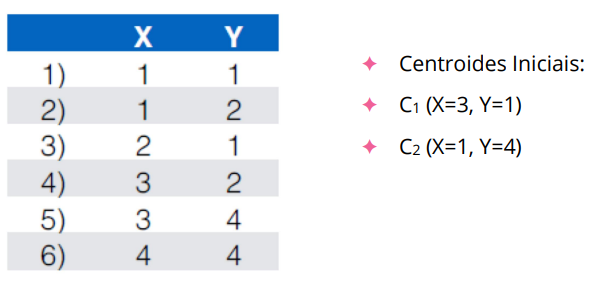

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = {
    'X': [1, 1, 2, 3, 3, 4],
    'Y': [1, 2, 1, 2, 4, 4]
}

df = pd.DataFrame(data)

df

,X,Y
0,1,1
1,1,2
2,2,1
3,3,2
4,3,4
5,4,4


In [3]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df['Cluster'] = labels

df

,X,Y,Cluster
0,1,1,0
1,1,2,0
2,2,1,0
3,3,2,0
4,3,4,1
5,4,4,1


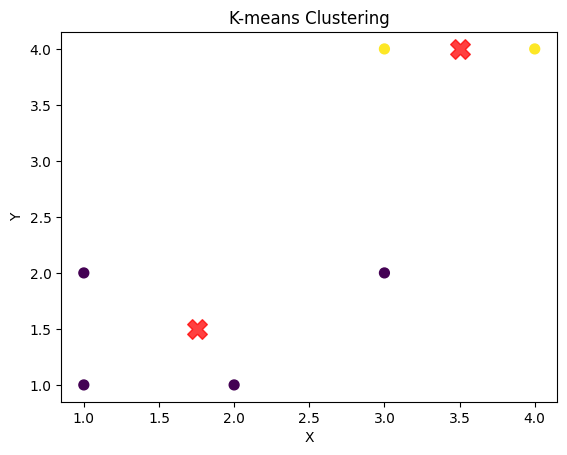

In [4]:
plt.scatter(df['X'], df['Y'], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

In [5]:
import numpy as np

sse = []
for i in range(2):
    cluster_points = df[df['Cluster'] == i][['X', 'Y']]
    centroid = centroids[i]
    sse.append(np.sum((cluster_points - centroid) ** 2))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:
print(sse)
print(centroids)

[X    2.75
Y    1.00
dtype: float64, X    0.5
Y    0.0
dtype: float64]
[[1.75 1.5 ]
 [3.5  4.  ]]
